# 1 Imports

In [1]:
import numpy as np 
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Dropout, Flatten
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import cv2


# 2 Preprocessing the data

Fetching the already split dataset

In [2]:
base_directory = "Splitted_Dataset/"

train_path=base_directory+"/train"
test_path=base_directory+"/test"
val_path=base_directory+"/val"

In [3]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(256,170))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(256,170))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(256,170))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [5]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (170,256),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (170,256),
                                            batch_size = 4,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (170,256),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


In [8]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [9]:
training_set.class_indices


{'butterfly': 0, 'cat': 1, 'dog': 2, 'elephant': 3, 'kangaroo': 4}

In [10]:
train_y.shape,test_y.shape,val_y.shape


((3500,), (750,), (750,))

# 3 Training the model

In [11]:
inputs = keras.Input(shape=(170,256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 170, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 168, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 127, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 60, 128)       73856 

In [12]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="5_animals_model2.h5",
    monitor="val_loss")
]

keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="sparse_categorical_crossentropy", 
optimizer="Adam", 
metrics=["accuracy"])

history = model.fit(
 train_x,
 train_y,
 batch_size=4,
 epochs=20,
 validation_data=(val_x,val_y),
 callbacks=callbacks,
 shuffle=True
)

Epoch 1/20
875/875 [==============================] - 13s 11ms/step - loss: 1.0606 - accuracy: 0.6083 - val_loss: 0.7170 - val_accuracy: 0.7493
Epoch 2/20
875/875 [==============================] - 8s 9ms/step - loss: 0.4429 - accuracy: 0.8411 - val_loss: 0.5891 - val_accuracy: 0.7947
Epoch 3/20
875/875 [==============================] - 8s 9ms/step - loss: 0.1827 - accuracy: 0.9389 - val_loss: 0.8407 - val_accuracy: 0.7960
Epoch 4/20
875/875 [==============================] - 8s 9ms/step - loss: 0.0628 - accuracy: 0.9774 - val_loss: 1.1838 - val_accuracy: 0.7400
Epoch 5/20
875/875 [==============================] - 8s 9ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 1.1613 - val_accuracy: 0.7693
Epoch 6/20
875/875 [==============================] - 8s 9ms/step - loss: 0.0471 - accuracy: 0.9831 - val_loss: 1.7133 - val_accuracy: 0.7653
Epoch 7/20
875/875 [==============================] - 8s 9ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 1.3619 - val_accuracy: 0.7653
Epoc

# 4 Plotting the training result

In [13]:
def plot_function(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "b", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "bo", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

Conclusion: this model is clearly overfitting from epoch 2 onwards.

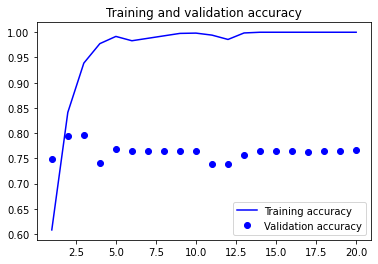

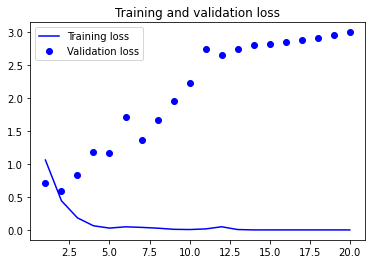

In [14]:
plot_function(history)

# 5 Testing the model on the testset

In [20]:
test_model = keras.models.load_model("5_animals_model2.h5")
test_loss, test_acc = test_model.evaluate(test_x, test_y)
print(f"Test accuracy: {test_acc:.3f}")

24/24 [==============================] - 1s 25ms/step - loss: 3.0167 - accuracy: 0.7693
Test accuracy: 0.769
